# Imbalanced Data

In [15]:
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [16]:
mammography=fetch_datasets()['mammography']

In [17]:
pd.DataFrame(mammography['target'])[0].value_counts()

-1    10923
 1      260
Name: 0, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mammography['data'],mammography['target'],test_size=0.20, random_state=123, stratify=mammography['target'])

In [19]:
pd.DataFrame(y_train)[0].value_counts()

-1    8738
 1     208
Name: 0, dtype: int64

In [20]:
pd.DataFrame(y_test)[0].value_counts()

-1    2185
 1      52
Name: 0, dtype: int64

In [21]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [22]:
#clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
#     min_samples_split=7, random_state=0,class_weight='balanced')

In [23]:
clf_random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred=clf_random.predict(X_test)


In [25]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))
              

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      2185
   Malignant       0.81      0.48      0.60        52

   micro avg       0.99      0.99      0.99      2237
   macro avg       0.90      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



In [26]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])


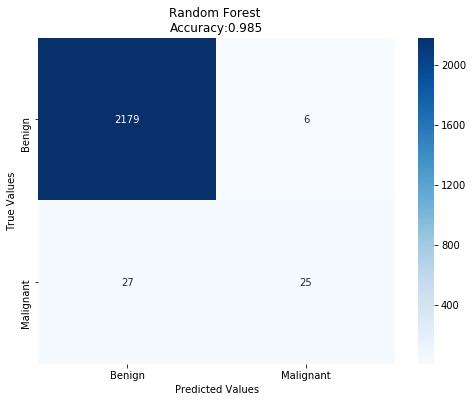

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()